In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mpl_toolkits import mplot3d
from numpy import set_printoptions
from numpy import absolute
from numpy import mean
from numpy import std

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns
%matplotlib inline

In [2]:
#2class prosody_data = pd.read_csv('prosodic_features_M.csv ')
#3class 
prosody_data = pd.read_csv('prosodic_features_MRH.csv ')

In [3]:
prosody_data.head()

,participant&question,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C,Hired5C,Hired6T,Hired01C,Hired4C
0,P1Q1,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,...,20.106,91,4722.964842,5.106224,1,1,5,0,1,2
1,P1Q2,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,...,15.886,71,2928.482587,5.106224,1,1,5,0,1,2
2,P1Q3,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441736,120.457847,...,16.951,79,3528.448990,5.106224,1,1,5,0,1,2
3,P1Q4,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,...,5.044,36,1924.546685,5.106224,1,1,5,0,1,2
4,P1Q5,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,...,11.073,19,1322.366516,5.106224,1,1,5,0,1,2


In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [5]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C,Hired5C,Hired6T,Hired01C,Hired4C
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,21.547319,88.869118,5564.506801,4.950746,0.566176,0.992647,4.963235,0.073529,0.661765,1.426471
std,36.117420,0.012226,0.000130,8.332808,41.614286,41.921335,13.154095,76.500370,46.615600,0.795525,...,8.454734,59.178885,4357.018782,0.721579,0.495966,0.818565,0.771435,0.261196,0.473457,0.810756
min,10.341458,0.000176,0.000013,56.049663,222.555742,92.979514,12.053274,76.004974,82.801688,0.301339,...,5.044000,11.000000,79.872717,3.189661,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,32.839339,0.002527,0.000065,71.320330,339.477409,124.543847,33.160269,196.724385,113.288462,0.736553,...,15.521250,47.750000,2712.929560,4.529477,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000
50%,49.762437,0.005648,0.000119,73.929065,376.743832,180.010964,40.569432,247.524278,178.438806,1.035074,...,20.215500,76.000000,4520.700221,4.967754,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000
75%,71.724484,0.013414,0.000221,75.644207,397.296921,203.342602,48.220307,293.743385,203.973193,1.350608,...,26.054000,112.250000,7249.827921,5.448852,1.000000,2.000000,5.000000,0.000000,1.000000,2.000000
max,376.992000,0.134692,0.000873,198.840510,424.360354,254.871233,97.363392,524.459680,247.959843,7.681538,...,53.887000,590.000000,40513.328260,6.647218,1.000000,2.000000,7.000000,1.000000,1.000000,3.000000


dA = pd.read_csv('prosodic_features_M1.csv ')
yRH = prosody_data['RecommendHiring']
yF = prosody_data['Friendly']
ySA = prosody_data['StructuredAnswers']
yNS = prosody_data['NotStressed']
cRH = prosody_data['Hired']
cF = prosody_data['Friendly_c']
cSA = prosody_data['StructuredAnswers_c']
cNS = prosody_data['NotStressed_c']


In [6]:
dA = pd.read_csv('prosodic_features_M1.csv ')
yRH = prosody_data['RecommendHiring']
cRH = prosody_data['Hired3C']

In [7]:
def drawHistogram(feature_name):
    sns.set_style('whitegrid')
    prosody_data[feature_name].hist(bins=30)
    plt.xlabel(feature_name)

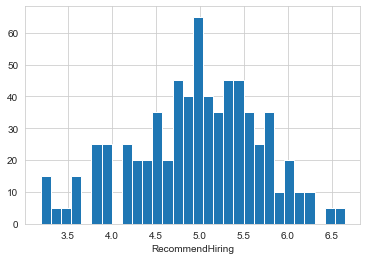

In [8]:
drawHistogram('RecommendHiring')

drawHistogram('Friendly')

drawHistogram('StructuredAnswers')

In [ ]:
drawHistogram('NotStressed')

In [ ]:
sns.jointplot(y='jitter', x='RecommendHiring', cmap= 'PiYG', data=prosody_data)

In [ ]:
sns.jointplot(y='jitter', x='Friendly', cmap= 'PiYG', data=prosody_data)

In [ ]:
sns.jointplot(y='jitter', x='StructuredAnswers', cmap= 'PiYG', data=prosody_data)

In [ ]:
sns.jointplot(y='jitter', x='NotStressed', cmap= 'PiYG', data=prosody_data)

Text(0.5, 0, 'RecommendHiring')

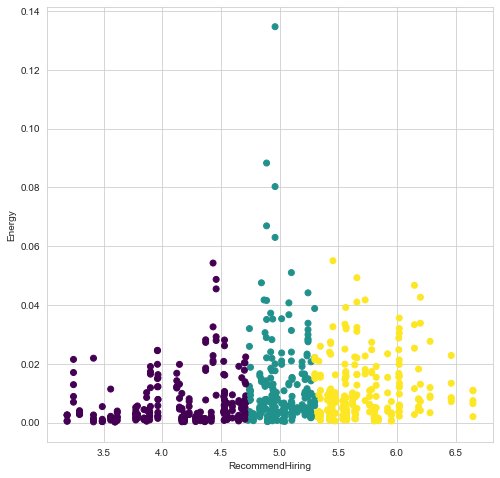

In [10]:

x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yRH,x1, c=cRH, cmap= 'viridis')
plt.ylabel('Energy')
plt.xlabel('RecommendHiring')


NameError: name 'ySA' is not defined

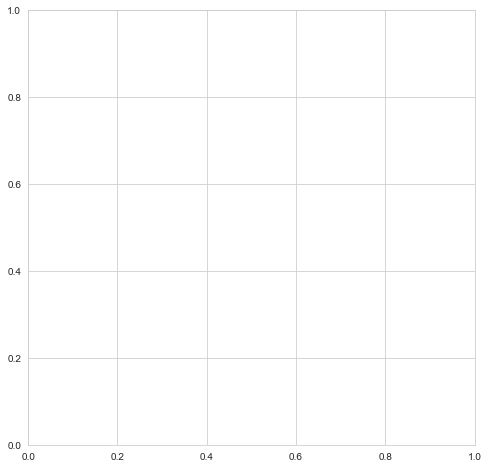

In [11]:

x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(ySA,x1, c=cSA, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('StructuredAnswers')


NameError: name 'yF' is not defined

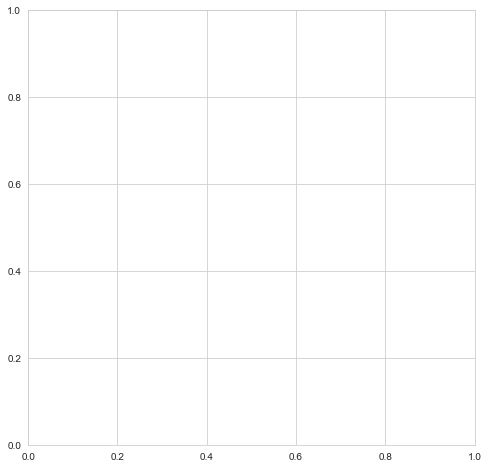

In [12]:
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yF,x1, c=cF, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('Friendly')


In [ ]:
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yNS,x1, c=cNS, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('Not Stressed')


In [ ]:
plt.scatter(yRH,x2,c=cRH, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('RecommendHiring')
plt.show()

In [ ]:
plt.scatter(yF,x2,c=cF, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Friendly')
plt.show()

In [ ]:
plt.scatter(yNS,x2,c=cNS, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Not Stressed')
plt.show()

In [ ]:
plt.scatter(ySA,x2,c=cSA, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Structured Answer')
plt.show()

In [ ]:
plt.scatter(yRH,x3,c=cRH, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('RecommenhHiring')
plt.show()

In [ ]:
plt.scatter(yF,x3,c=cF, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('Friendly')
plt.show()

In [ ]:
plt.scatter(ySA,x3,c=cSA, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('StructuredAnswers')
plt.show()

In [ ]:
plt.scatter(yNS,x3,c=cNS, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('Not Stressed')
plt.show()

In [ ]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Hired3C']]
sns.pairplot(df1,hue='Hired3C',palette='viridis_r')

In [ ]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Friendly_c']]
sns.pairplot(df1,hue='Friendly_c',palette='viridis_r')

In [ ]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','StructuredAnswers_c']]
sns.pairplot(df1,hue='StructuredAnswers_c',palette='viridis_r')

In [ ]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','NotStressed_c']]
sns.pairplot(df1,hue='NotStressed_c',palette='viridis_r')

In [ ]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('viridis_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cRH,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'RecommendHiring', aspect = 5)

# show plot


plt.show()



In [ ]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yF,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'Friendly', aspect = 5)

# show plot


plt.show()



In [ ]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yNS,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'NotStressed', aspect = 5)

# show plot


plt.show()

In [ ]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = ySA,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'StructuredAnswer', aspect = 5)

# show plot


plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yF,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Friendly',aspect = 5)

# show plot


plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = ySA,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Structured Answer',aspect = 5)

# show plot


plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yNS,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Not Stressed',aspect = 5)

# show plot


plt.show()

In [ ]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cF,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cF, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cF, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


In [ ]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cSA,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cSA, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cSA, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


In [ ]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cNS,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cNS, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cNS, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


In [ ]:
cor = dA.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

In [ ]:
sns.boxplot(x=cF, y='meanPeriod',data= prosody_data)

In [ ]:
sns.boxplot(x=cSA, y='f2STDf1',data= prosody_data)

In [ ]:
sns.boxplot(x=cNS, y='power',data= prosody_data)

In [ ]:
sns.boxplot(x=cF, y='avgBand1',data= prosody_data)

In [ ]:
sns.boxplot(x=cRH, y='avgBand1',data= prosody_data).set(
    xlabel='RecommendHiring', 
)

In [ ]:
sns.boxplot(x=cNS, y='avgBand1',data= prosody_data)

In [ ]:
sns.boxplot(x=cSA, y='avgBand1',data= prosody_data)

In [ ]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
fig, ax = plt.subplots()
box_plot([yF,ySA,yNS,yRH], 'red', 'brown')
#ax.set(y='avgBand1')
plt.show()

box_plot([yF,ySA,yNS,yRH], 'blue', 'cyan')
ax.set_ylim(prosody_data['meanPeriod'])

plt.show()

In [ ]:
Hr = np.array(cF.value_counts())
arr = cF
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Friendly')
    else:
        arrLB.append('NotFriendly')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

In [ ]:
Hr = np.array(cNS.value_counts())
arr = cNS
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Not Stressed')
    else:
        arrLB.append('Stressed')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[12,12],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

In [ ]:
Hr = np.array(cSA.value_counts())
arr = cSA
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Structured Answer')
    else:
        arrLB.append('Not Structured Answer')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

In [ ]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

# Feature Selection Using Kbest

In [ ]:

def select_feature_kbest(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    # feature extraction
    kbest_test = SelectKBest(score_func=f_classif, k=4)
    fit = kbest_test.fit(X, y)
    # summarize scores
    set_printoptions(precision=3)
    #print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    #print(features[0:5,:])

    ranks["kbest"] = rank_to_dict(np.abs(fit.scores_), prosody_data_X)
    rankDict = {}
    rankDict = ranks["kbest"]
    return rankDict


# Feature Selection Using Ridge Regression

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
def select_feature_ridge(prosody_data_y):
    array = prosody_data.values
    X=prosody_data_X
    y=prosody_data_y
    # define model
    ridge_model = Ridge(alpha=1.0)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    print(scores)
    
    ranks["ridge"] = rank_to_dict(np.abs(scores), prosody_data_X)
    rankDict = {}
    rankDict = ranks["ridge"]
    return rankDict

# Feature Selection Using Lasso

In [ ]:
from sklearn.linear_model import Lasso 

def select_feature_lasso(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    
    lasso = Lasso(alpha=.5)
    lasso.fit(X, y)

    cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
    rankDict = {}
    rankDict = ranks['Lasso']
    return rankDict

# Feature Selection Using LDA

In [ ]:
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
def select_feature_LDA(prosody_data_y):
    X= prosody_data_X
    y= prosody_data_y
    # define model
    model = LinearDiscriminantAnalysis(solver='lsqr')
    # define model evaluation method
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['shrinkage'] = arange(0, 1, 0.01)
    # define search
    search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
    # perform the search
    results = search.fit(X, y)
    # summarize
    print('Mean Accuracy: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)

# Making arrays of Top 10 20 30 Features

In [ ]:
def select_features(rankDict):
    selectedFeatures = []

    selectedFeatures = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


    selectedFeatures_10 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<10):
            selectedFeatures_10.append(key)
            i+=1

    selectedFeatures_20 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<20):
            selectedFeatures_20.append(key)
            i+=1

    selectedFeatures_30 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<30):
            selectedFeatures_30.append(key)
            i+=1
    return selectedFeatures_10,selectedFeatures_20,selectedFeatures_30


In [ ]:
prosody_data_X = prosody_data.drop(['participant&question','Hired','RecommendHiring','Friendly','Friendly_c','StructuredAnswers','StructuredAnswers_c','NotStressed','NotStressed_c'],axis=1)

# Feature selection for RecommendHirig using KBest

In [ ]:
#feature ranks for RecommendHiring
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Kbest=select_feature_kbest(yRH)
print("\nScores of Features for RecommendHiring")
selectedFeatures_RecommendHiring_Kbest

In [ ]:
selectedFeatures_kbest_10_RecommendHiring,selectedFeatures_kbest_20_RecommendHiring,selectedFeatures_kbest_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Kbest)

print("Top 10 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_10_RecommendHiring )

print("\n\n\nTop 20 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_20_RecommendHiring )

print("\n\n\nTop 30 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_30_RecommendHiring )

# Feature selection for Friendly using KBest

In [ ]:
#feature ranks for friendly
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Kbest=select_feature_kbest(yF)
print("\nScores of Features for Friendly")
selectedFeatures_Friendly_Kbest

In [ ]:
selectedFeatures_kbest_10_Friendly,selectedFeatures_kbest_20_Friendly,selectedFeatures_kbest_30_Friendly= select_features(selectedFeatures_Friendly_Kbest)

print("Top 10 Selected Features Using kbest for friendly:",selectedFeatures_kbest_10_Friendly )

print("\n\n\nTop 20 Selected Features Using kbest for friendly:",selectedFeatures_kbest_20_Friendly )

print("\n\n\nTop 30 Selected Features Using kbest for friendly:",selectedFeatures_kbest_30_Friendly )


# Feature selection for Not Stressed using KBest

In [ ]:
#feature ranks for Stressed
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Kbest=select_feature_kbest(yNS)
print("\nScores of Features for Not Stressed")
#selectedFeatures_NotStressed

In [ ]:
selectedFeatures_kbest_10_NotStressed,selectedFeatures_kbest_20_NotStressed,selectedFeatures_kbest_30_NotStressed= select_features(selectedFeatures_NotStressed_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_NotStressed )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_NotStressed )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_NotStressed )

# Feature selection for Structured Answer using KBest

In [ ]:
#feature ranks for Structured Answer
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Kbest=select_feature_kbest(ySA)
print("\nScores of Features for Not Structured Answer")
#selectedFeatures_StructuredAnswer

In [ ]:
selectedFeatures_kbest_10_StructuredAnswer,selectedFeatures_kbest_20_StructuredAnswer,selectedFeatures_kbest_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_StructuredAnswer )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_StructuredAnswer )

# Feature selection for RecommendHiring using Ridge

In [ ]:
#feature ranks for RecommendHiring ridge
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Ridge=select_feature_ridge(yRH)
print("\nScores of Features for RecommendHiring")
selectedFeatures_RecommendHiring_Ridge

In [ ]:
selectedFeatures_ridge_10_RecommendHiring,selectedFeatures_ridge_20_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Ridge)

print("Top 10 Selected Features For RecommendHiring Using ridge :",selectedFeatures_ridge_10_RecommendHiring )

print("\n\n\nTop 20 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_20_RecommendHiring )

print("\n\n\nTop 30 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_30_RecommendHiring )

# Feature selection for Friendly using Ridge

In [ ]:
#feature ranks for friendly ridge
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Ridge=select_feature_ridge(yF)
print("\nScores of Features for Friendly")
selectedFeatures_Friendly_Ridge

In [ ]:
selectedFeatures_ridge_10_Friendly,selectedFeatures_ridge_20_Friendly,selectedFeatures_ridge_30_Friendly= select_features(selectedFeatures_Friendly_Ridge)

print("Top 10 Selected Features For Friendly Using ridge :",selectedFeatures_ridge_10_Friendly )

print("\n\n\nTop 20 Selected For Friendly Features Using ridge:",selectedFeatures_ridge_20_Friendly )

print("\n\n\nTop 30 Selected For Friendly Features Using ridge:",selectedFeatures_ridge_30_Friendly )

# Feature selection for Not Stressed using Ridge

In [ ]:
#feature ranks for Not Stressed ridge
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Ridge=select_feature_ridge(yNS)
print("\nScores of Features for Not Stressed")
selectedFeatures_NotStressed_Ridge


In [ ]:
selectedFeatures_ridge_10_NotStressed,selectedFeatures_ridge_20_NotStressed,selectedFeatures_ridge_30_NotStressed= select_features(selectedFeatures_NotStressed_Ridge)

print("Top 10 Selected Features Using ridge for Not Stressed:",selectedFeatures_ridge_10_NotStressed )

print("\n\n\nTop 20 Selected Features Using for Not Stressed:",selectedFeatures_ridge_20_NotStressed )

print("\n\n\nTop 30 Selected Features Using for Not Stressed:",selectedFeatures_ridge_30_NotStressed)

In [ ]:
#feature ranks for StructuredAnswer ridge
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Ridge=select_feature_ridge(ySA)
print("\nScores of Features for Structured Answer")
selectedFeatures_StructuredAnswer_Ridge


# Feature selection for Structured Answer using Ridge

In [ ]:
selectedFeatures_ridge_10_StructuredAnswer,selectedFeatures_ridge_20_StructuredAnswer,selectedFeatures_ridge_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Ridge)

print("Top 10 Selected Features for Structured Answer Using ridge:",selectedFeatures_ridge_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features For Structured AnswerUsing ridge:",selectedFeatures_ridge_20_StructuredAnswer)

print("\n\n\nTop 30 Selected Features Using For Structured Answer ridge:",selectedFeatures_ridge_30_StructuredAnswer )

# Feature selection for friendly Answer using RecommendHiring

In [ ]:
#feature ranks for RecommendHiring using Lasso
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Lasso=select_feature_lasso(yRH)
print("\nScores of Features for RecommendHiring using Lasso")
selectedFeatures_RecommendHiring_Lasso

In [ ]:
selectedFeatures_lasso_10_RecommendHiring,selectedFeatures_lasso_20_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Lasso)

print("Top 10 Selected Features for RecommendHiring Using Lasso:",selectedFeatures_lasso_10_RecommendHiring )

print("\n\n\nTop 20 Selected Features For RecommendHiring Using Lasso:",selectedFeatures_lasso_20_RecommendHiring)

print("\n\n\nTop 30 Selected Features Using For RecommendHiring Using Lasso:",selectedFeatures_lasso_30_RecommendHiring )

# Feature selection for friendly using Lasso

In [ ]:
#feature ranks for friendly using Lasso
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Lasso=select_feature_lasso(yF)
print("\nScores of Features for Friendly using Lasso")
selectedFeatures_Friendly_Lasso

In [ ]:
selectedFeatures_lasso_10_Friendly,selectedFeatures_lasso_20_Friendly,selectedFeatures_lasso_30_Friendly= select_features(selectedFeatures_Friendly_Lasso)

print("Top 10 Selected Features for Friendly Using Lasso:",selectedFeatures_lasso_10_Friendly )

print("\n\n\nTop 20 Selected Features For Friendly Using Lasso:",selectedFeatures_lasso_20_Friendly)

print("\n\n\nTop 30 Selected Features Using For Friendly Using Lasso:",selectedFeatures_lasso_30_Friendly )

In [ ]:
#feature ranks for Not Stressed using Lasso
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Lasso=select_feature_lasso(yNS)
print("\nScores of Features for Not Stressed using Lasso")
selectedFeatures_NotStressed_Lasso

In [ ]:
selectedFeatures_lasso_10_NotStressed,selectedFeatures_lasso_20_NotStressed,selectedFeatures_lasso_30_NotStressed= select_features(selectedFeatures_NotStressed_Lasso)

print("Top 10 Selected Features for NotStressed Using Lasso:",selectedFeatures_lasso_10_NotStressed )

print("\n\n\nTop 20 Selected Features For NotStressed Using Lasso:",selectedFeatures_lasso_20_NotStressed)

print("\n\n\nTop 30 Selected Features Using For NotStressed Using Lasso:",selectedFeatures_lasso_30_NotStressed )

In [ ]:
#feature ranks for Structured Answer using Lasso
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Lasso=select_feature_lasso(ySA)
print("\nScores of Features for Structured Answer using Lasso")
selectedFeatures_StructuredAnswer_Lasso

In [ ]:
selectedFeatures_lasso_10_StructuredAnswer,selectedFeatures_lasso_20_StructuredAnswer,selectedFeatures_lasso_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Lasso)

print("Top 10 Selected Features for StructuredAnswer Using Lasso:",selectedFeatures_lasso_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features For StructuredAnswer Using Lasso:",selectedFeatures_lasso_20_StructuredAnswer)

print("\n\n\nTop 30 Selected Features Using For StructuredAnswer Using Lasso:",selectedFeatures_lasso_30_StructuredAnswer )

# Apply NN models

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
def apply_NN_Moadel(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var,T_Val):
    scaler = MinMaxScaler()
    X=scaler.fit_transform(prosody_data[selectedFeatures_No])
    y=d_Var
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    
    cvscores = []
        
    keras.backend.set_floatx('float64')
    
    # create model
    for train, test in kfold.split(X, y):
        model= keras.Sequential([
            keras.layers.Dense(no_of_inNeurons, input_shape=(no_of_inNeurons,), activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        # Fit the model
        clf=model.fit(X_train, y_train, epochs=no_of_epochs, batch_size=10, verbose=0)


        # evaluate the model 
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

        cvscores.append(scores[1] * 100)
        
               
        
    
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))    
    
    #Plot ROC
    
    tnser_pred = model.predict(X_test)
    # generate a no skill prediction (majority class)
    ns_pred = [0 for _ in range(len(y_test))]
    # calculate accuracy scores
    ns_auc = roc_auc_score(y_test, ns_pred)
    tnser_auc = roc_auc_score(y_test, tnser_pred)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (tnser_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_pred)
    tnser_fpr, tnser_tpr, _ = roc_curve(y_test, tnser_pred)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
    plt.plot(tnser_fpr, tnser_tpr,marker='o', label='NN ' )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
  
    
    pred1=[]
    pred=model.predict(X_test)
    for element in pred:
        if element >= T_Val:
            pred1.append(1)
        else:
            pred1.append(0)
    print(classification_report(y_test,pred1,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred1))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred1), annot = True,fmt='d')
    plt.show
    
    
    return (model, cvscores, tnser_fpr, tnser_tpr, tnser_auc)

In [ ]:
#SetThreshol values for features
TF = 5     # for Friendly
TNS = 5.5  # for Not Stressed
TSA = 5.5  # for Structured Answer
TRH = 6    # for Recommend Hiring

In [ ]:
cvscores_NN_10_ridge_StructuredAnswer= []
(model_NN_10_ridge_StructuredAnswer,cvscores_NN_10_ridge_StructuredAnswer,FP_Rate_NN_10_ridge_StructuredAnswer,TP_Rate_NN_10_ridge_StructuredAnswer,auc_NN_10_ridge_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_20_ridge_StructuredAnswer= [] 
(model_NN_20_ridge_StructuredAnswer,cvscores_NN_20_ridge_StructuredAnswer,FP_Rate_NN_20_ridge_StructuredAnswer,TP_Rate_NN_20_ridge_StructuredAnswer,auc_NN_20_ridge_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_30_ridge_StructuredAnswer= []
(model_NN_30_ridge_StructuredAnswer,cvscores_NN_30_ridge_StructuredAnswer,FP_Rate_NN_30_ridge_StructuredAnswer,TP_Rate_NN_30_ridge_StructuredAnswer,auc_NN_30_ridge_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_10_lasso_StructuredAnswer= [] 
(model_NN_10_lasso_StructuredAnswer,cvscores_NN_10_lasso_StructuredAnswer,FP_Rate_NN_10_lasso_StructuredAnswer,TP_Rate_NN_10_lasso_StructuredAnswer,auc_NN_10_lasso_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_20_lasso_StructuredAnswer= [] 
(model_NN_20_lasso_StructuredAnswer,cvscores_NN_20_lasso_StructuredAnswer,FP_Rate_NN_20_lasso_StructuredAnswer,TP_Rate_NN_20_lasso_StructuredAnswer,auc_NN_20_lasso_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_30_lasso_StructuredAnswer= [] 
(model_NN_30_lasso_StructuredAnswer,cvscores_NN_30_lasso_StructuredAnswer,FP_Rate_NN_30_lasso_StructuredAnswer,TP_Rate_NN_30_lasso_StructuredAnswer,auc_NN_30_lasso_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_10_kbest_StructuredAnswer= [] 
(model_NN_10_kbest_StructuredAnswer,cvscores_NN_10_kbest_StructuredAnswer,FP_Rate_NN_10_kbest_StructuredAnswer,TP_Rate_NN_10_kbest_StructuredAnswer,auc_NN_10_kbest_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_20_kbest_StructuredAnswer= [] 
(model_NN_20_kbest_StructuredAnswer,cvscores_NN_20_kbest_StructuredAnswer,FP_Rate_NN_20_kbest_StructuredAnswer,TP_Rate_NN_20_kbest_StructuredAnswer,auc_NN_20_kbest_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_30_kbest_StructuredAnswer= [] 
(model_NN_30_kbest_StructuredAnswer,cvscores_NN_30_kbest_StructuredAnswer,FP_Rate_NN_30_kbest_StructuredAnswer,TP_Rate_NN_30_kbest_StructuredAnswer,auc_NN_30_kbest_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_StructuredAnswer,cSA,TSA)

In [ ]:
cvscores_NN_10_ridge_RecommendHiring= [] 
(model_NN_10_ridge_RecommendHiring,cvscores_NN_10_ridge_RecommendHiring,FP_Rate_NN_10_ridge_StructuredAnswer,TP_Rate_NN_10_ridge_RecommendHiring,auc_NN_10_ridge_RecommendHiring) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_20_ridge_RecommendHiring= [] 
(model_NN_20_ridge_RecommendHiring,cvscores_NN_20_ridge_RecommendHiring,FP_Rate_NN_20_ridge_RecommendHiring,TP_Rate_NN_20_ridge_RecommendHiring,auc_NN_20_ridge_RecommendHiring) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_30_ridge_RecommendHiring= [] 
(model_NN_30_ridge_RecommendHiring,cvscores_NN_30_ridge_RecommendHiring,FP_Rate_NN_30_ridge_RecommendHiring,TP_Rate_NN_30_ridge_RecommendHiring,auc_NN_30_ridge_RecommendHiring) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_10_lasso_RecommendHiring= [] 
(model_NN_10_lasso_RecommendHiring,cvscores_NN_10_lasso_RecommendHiring,FP_Rate_NN_10_lasso_RecommendHiring,TP_Rate_NN_10_lasso_RecommendHiring,auc_NN_10_lasso_RecommendHiring) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_20_lasso_RecommendHiring= [] 
(model_NN_20_lasso_RecommendHiring,cvscores_NN_20_lasso_RecommendHiring,FP_Rate_NN_20_lasso_RecommendHiring,TP_Rate_NN_20_lasso_RecommendHiring,auc_NN_20_lasso_RecommendHiring) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_30_lasso_RecommendHiring= [] 
(model_NN_30_lasso_RecommendHiring,cvscores_NN_30_lasso_RecommendHiring,FP_Rate_NN_30_lasso_RecommendHiring,TP_Rate_NN_30_lasso_RecommendHiring,auc_NN_30_lasso_RecommendHiring) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_10_kbest_RecommendHirig= [] 
(model_NN_10__kbest_RecommendHirig,cvscores_NN_10_kbest_RecommendHirig,FP_Rate_NN_10_kbest_RecommendHirig,TP_Rate_NN_10_kbest_RecommendHirig,auc_NN_10_kbest_RecommendHirig) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_20_kbest_RecommendHirig= [] 
(model_NN_20__kbest_RecommendHirig,cvscores_NN_20_kbest_RecommendHirig,FP_Rate_NN_20_kbest_RecommendHirig,TP_Rate_NN_30_kbest_RecommendHirig,auc_NN_20_kbest_RecommendHirig) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_30_kbest_RecommendHirig= [] 
(model_NN_30__kbest_RecommendHirig,cvscores_NN_30_kbest_RecommendHirig,FP_Rate_NN_30_kbest_RecommendHirig,TP_Rate_NN_30_kbest_RecommendHirig,auc_NN_30_kbest_RecommendHirig) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_RecommendHiring,cRH,TRH)

In [ ]:
cvscores_NN_10_ridge_Friendly= [] 
(model_NN_10_ridge_Friendly,cvscores_NN_10_ridge_Friendly,FP_Rate_NN_10_ridge_Friendly,TP_Rate_NN_10_ridge_Friendly,auc_NN_10_ridge_Friendly) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_Friendly,cF,TF)

In [ ]:
cvscores_NN_20_ridge_Friendly= [] 
(model_NN_20_ridge_Friendly,cvscores_NN_20_ridge_Friendly,FP_Rate_NN_20_ridge_Friendly,TP_Rate_NN_20_ridge_Friendly,auc_NN_20_ridge_Friendly) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_Friendly,cF,TF)

In [ ]:
cvscores_NN_30_ridge_Friendly= [] 
(model_NN_30_ridge_Friendly,cvscores_NN_30_ridge_Friendly,FP_Rate_NN_30_ridge_Friendly,TP_Rate_NN_30_ridge_Friendly,auc_NN_30_ridge_Friendly) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_Friendly,cF,TF)

In [ ]:
cvscores_NN_10_lasso_Friendly= [] 
(model_NN_10_lasso_Friendly,cvscores_NN_10_lasso_Friendly,FP_Rate_NN_10_lasso_Friendly,TP_Rate_NN_10_lasso_Friendly,auc_NN_10_lasso_Friendly) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_Friendly,cF,TF)

In [ ]:
cvscores_NN_20_lasso_Friendly= [] 
(model_NN_20_lasso_Friendly,cvscores_NN_20_lasso_Friendly,FP_Rate_NN_20_lasso_Friendly,TP_Rate_NN_20_lasso_Friendly,auc_NN_20_lasso_Friendly) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_Friendly,cF,TF)

In [ ]:
cvscores_NN_30_lasso_Friendly= [] 
(model_NN_30_lasso_Friendly,cvscores_NN_30_lasso_Friendly,FP_Rate_NN_30_lasso_Friendly,TP_Rate_NN_30_lasso_Friendly,auc_NN_30_lasso_Friendly) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_Friendly,cF,TF)

In [ ]:
cvscores_NN_10_kbest_Friendly= [] 
(model_NN_10_kbest_Friendly,cvscores_NN_10_kbest_Friendly,FP_Rate_NN_10_kbest_Friendly,TP_Rate_NN_10_kbest_Friendly,auc_NN_10_kbest_Friendly) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_Friendly,cF,TF)

In [ ]:
cvscores_NN_20_kbest_Friendly= [] 
(model_NN_20_kbest_Friendly,cvscores_NN_20_kbest_Friendly,FP_Rate_NN_20_kbest_Friendly,TP_Rate_NN_20_kbest_Friendly,auc_NN_20_kbest_Friendly) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_Friendly,cF,TF)

In [ ]:
cvscores_NN_30_kbest_Friendly= [] 
(model_NN_30_kbest_Friendly,cvscores_NN_30_kbest_Friendly,FP_Rate_NN_30_kbest_Friendly,TP_Rate_NN_30_kbest_Friendly,auc_NN_30_kbest_Friendly) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_Friendly,cF,TF)

In [ ]:
cvscores_NN_10_ridge_NotStressed= [] 
(model_NN_10_ridge_NotStressed,cvscores_NN_10_ridge_NotStressed,FP_Rate_NN_10_ridge_NotStressed,TP_Rate_NN_10_ridge_NotStressed,auc_NN_10_ridge_NotStressed) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_20_ridge_NotStressed= [] 
(model_NN_20_ridge_NotStressed,cvscores_NN_20_ridge_NotStressed,FP_Rate_NN_20_ridge_NotStressed,TP_Rate_NN_20_ridge_NotStressed,auc_NN_20_ridge_NotStressed) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_30_ridge_NotStressed= [] 
(model_NN_30_ridge_NotStressed,cvscores_NN_30_ridge_NotStressed,FP_Rate_NN_30_ridge_NotStressed,TP_Rate_NN_30_ridge_NotStressed,auc_NN_30_ridge_NotStressed) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_10_lasso_NotStressed= [] 
(model_NN_10_lasso_NotStressed,cvscores_NN_10_lasso_NotStressed,FP_Rate_NN_10_lasso_NotStressed,TP_Rate_NN_10_lasso_NotStressed,auc_NN_10_lasso_NotStressed) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_20_lasso_NotStressed= [] 
(model_NN_20_lasso_NotStressed,cvscores_NN_20_lasso_NotStressed,FP_Rate_NN_20_lasso_NotStressed,TP_Rate_NN_20_lasso_NotStressed,auc_NN_20_lasso_NotStressed) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_30_lasso_NotStressed= [] 
(model_NN_30_lasso_NotStressed,cvscores_NN_30_lasso_NotStressed,FP_Rate_NN_30_lasso_NotStressed,TP_Rate_NN_30_lasso_NotStressed,auc_NN_30_lasso_NotStressed) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_10_kbest_NotStressed= [] 
(model_NN_10_kbest_NotStressed,cvscores_NN_10_kbest_NotStressed,FP_Rate_NN_10_kbest_NotStressed,TP_Rate_NN_10_kbest_NotStressed,auc_NN_10_kbest_NotStressed) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_20_kbest_NotStressed= [] 
(model_NN_20_kbest_NotStressed,cvscores_NN_20_kbest_NotStressed,FP_Rate_NN_20_kbest_NotStressed,TP_Rate_NN_20_kbest_NotStressed,auc_NN_20_kbest_NotStressed) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_NotStressed,cNS,TNS)

In [ ]:
cvscores_NN_30_kbest_NotStressed= [] 
(model_NN_30_kbest_NotStressed,cvscores_NN_30_kbest_NotStressed,FP_Rate_NN_30_kbest_NotStressed,TP_Rate_NN_30_kbest_NotStressed,auc_NN_30_kbest_NotStressed) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_NotStressed,cNS,TNS)

# Apply Other Models

In [ ]:
def Apply_Model(model,model_name,X_train,X_test,y_train,y_test):
    
    clf = model.fit(X_train,y_train)
    pred = model.predict(X_test)            
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train,y_train)
    # predict probabilities
    m_probs = model.predict_proba(X_test)
        
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    m_auc = roc_auc_score(y_test, m_probs)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (m_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label=model_name)   
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred))
    
    if(model == svc_model):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == knn):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == rfc):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    print("Mean : ",m_Cross)
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(m_Cross), np.std(m_Cross)))
    
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt='d')
    plt.show()
    
    
    return (m_fpr, m_tpr,m_auc)

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
X20=prosody_data[selectedFeatures_kbest_20_Friendly]
y20=cF
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20, random_state=10)

# Applying Random Forest Classifier¶

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
(rfc_fpr, rfc_tpr, rfc_auc)=Apply_Model(rfc,"RFC",X20_train, X20_test, y20_train, y20_test)

cross_val_score(rfc, X20, y20,cv=10)


In [ ]:
dA1= prosody_data[['Friendly','NotStressed','StructuredAnswers']]
cor =dA1.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)



In [ ]:
RidgeRegScratch.fit()